# Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

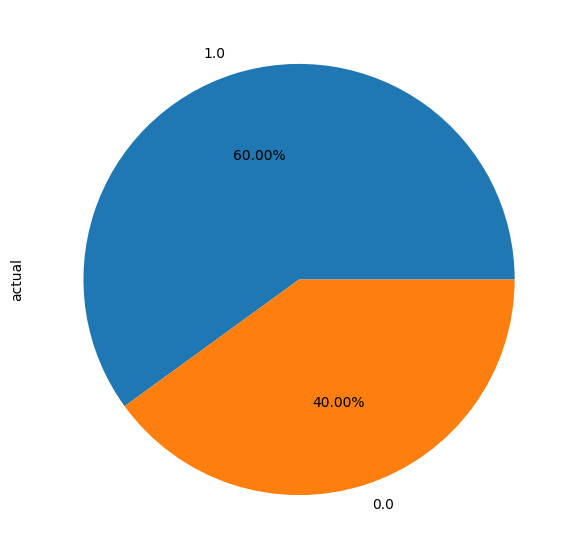

In [2]:
plt.figure(figsize = (15, 7))
_ = results.actual.value_counts().plot.pie(autopct = '%1.2f%%')

> class 1 is 60% and 0 is 40% 

> This slight imbalance would not cause any huge bias.

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

<Axes: ylabel='Frequency'>

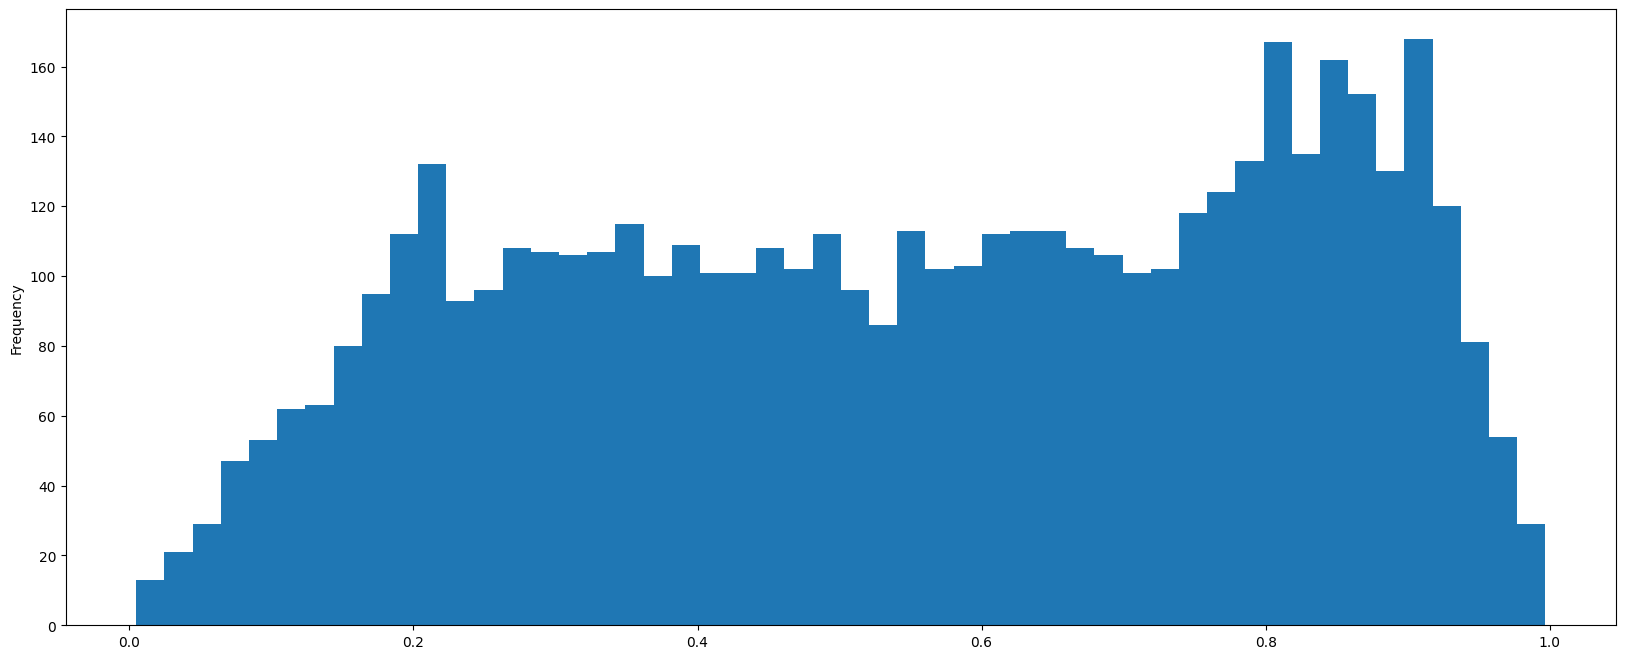

In [3]:
plt.figure(figsize = (20, 8))
results['prob'].plot.hist(bins = 50)

> 0.0 to 0.2  has lower distribution. 

> 0.8 to 0.9 has slightly higher distribution.


## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [4]:
results['Preds'] = results['prob'].round()

In [5]:
conf_matrix = []

conf_matrix.append( [results[ (results['actual'] == 0) & (results['Preds'] == 0)].shape[0],
                    results[ (results['actual'] == 0) & (results['Preds'] == 1)].shape[0]])

conf_matrix.append( [results[ (results['actual'] == 1) & (results['Preds'] == 0)].shape[0],
                    results[ (results['actual'] == 1) & (results['Preds'] == 1)].shape[0]])

In [6]:
print(conf_matrix)

[[1790, 210], [377, 2623]]


> 4413 samples are correctly classfied.

---
## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

# Accuracy

In [7]:
accuracy = (conf_matrix[0][0] + conf_matrix[1][1])/results.shape[0]

print(f'Accuracy is: {accuracy}')

Accuracy is: 0.8826


# Precision

In [8]:
precision = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])

print('Precision is: ', precision)

Precision is:  0.895


# Recall

In [9]:
recall = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[1][0])

print('Recall is: ', recall)

Recall is:  0.8260267651130595


Which measure would you use if this was your model and why?

> Here we don't know the the problem statement. So we cannot decided which matrix to use for evaluation.

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

In [10]:
fpr, tpr, x = metrics.roc_curve(results['actual'],  results['prob'])

Text(0.5, 1.0, 'ROC Curve')

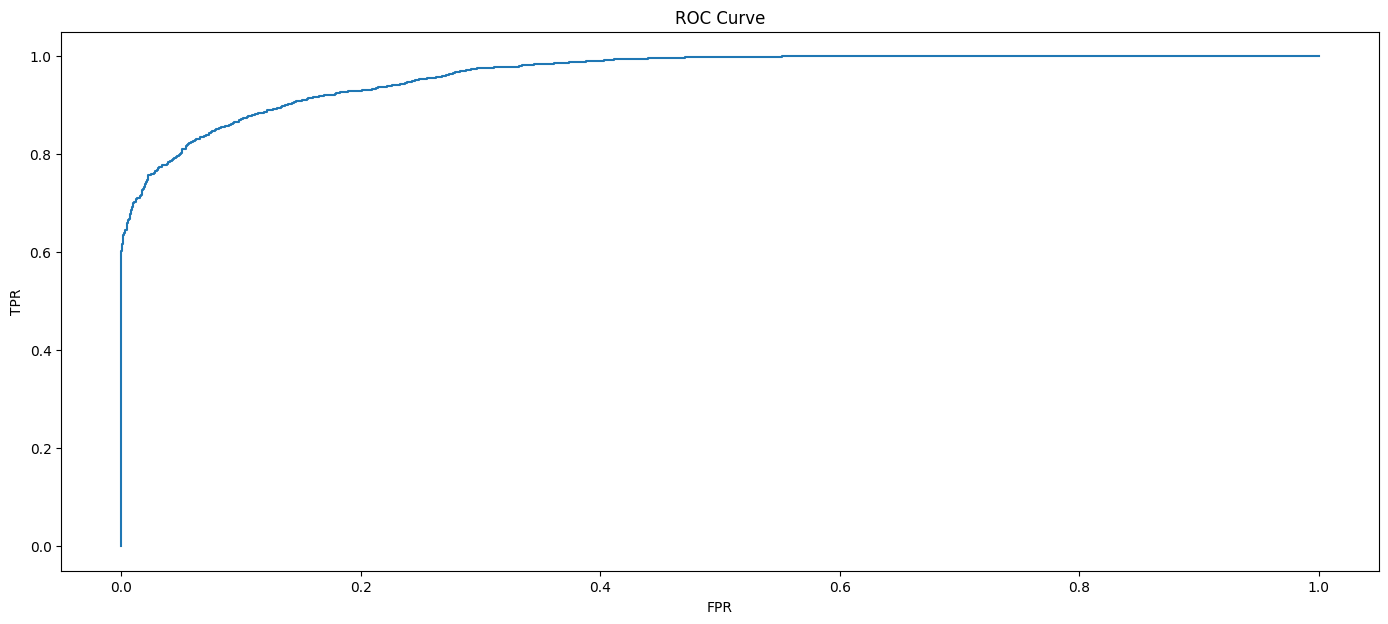

In [11]:
_ = plt.figure(figsize=(17, 7))
plt.plot(fpr,tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')

> As we can see the curve is closer to the upper left corner, we can say that the model is performing good. 